<a href="https://colab.research.google.com/github/putrirahmawati1205/PCVK_Ganjil_2023/blob/main/Week_6_PCVk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the existing folder on your Drive as follows

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

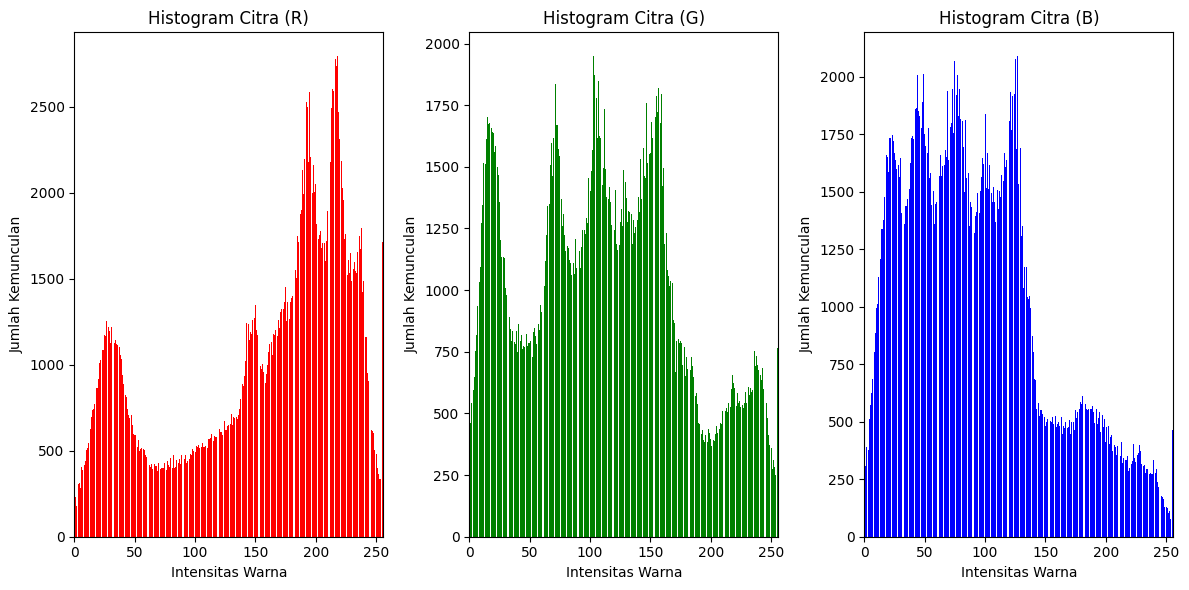

In [82]:
# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Calculate histograms for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Create a subplot for the RGB histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Histogram Citra (R)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_r[:, 0], color='red', label='Red (R)')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Histogram Citra (G)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_g[:, 0], color='green',label='Green (G)')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Histogram Citra (B)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(np.arange(256), hist_b[:, 0], color='blue',label='Blue (B)')
plt.xlim([0, 256])

# Display the histograms
plt.tight_layout()
plt.show()

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

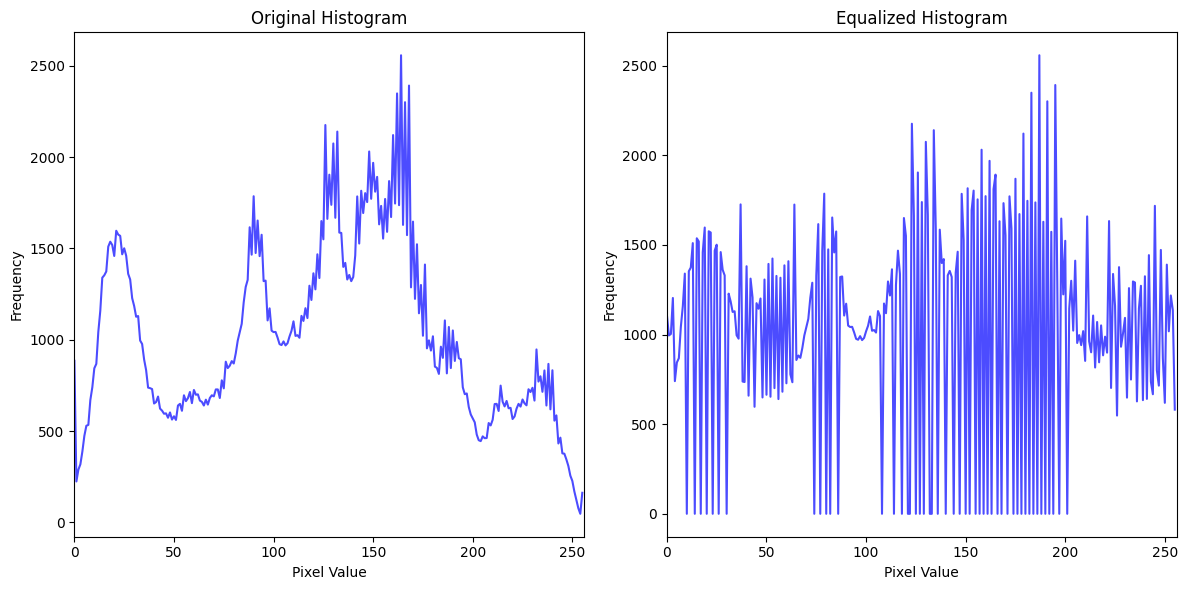

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply histogram equalization using OpenCV
equalized_image = cv2.equalizeHist(image)

# Calculate the histograms for the original and equalized images using NumPy
hist_original = np.histogram(image, bins=256, range=(0, 256))[0]
hist_equalized = np.histogram(equalized_image, bins=256, range=(0, 256))[0]

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_original, color='blue', alpha=0.7)
plt.xlim([0, 256])

plt.subplot(122)
plt.title("Equalized Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized, color='blue', alpha=0.7)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

First code:
- Use color images (RGB) because Lena images are loaded as color images.
- Split the image into red (R), green (G), and blue (B) channels.
- Calculate the histogram for each color channel separately.
Displays histograms for each color channel in three different subplots.

Second code:
- Use the image in grayscale mode because the Lena image is loaded as a grayscale image using cv2.IMREAD_GRAYSCALE. Use cv2.equalizeHist() to perform histogram equalization on a grayscale image.
- Use NumPy to calculate the histogram of the original image and the equalized image.
- Displays the original graph and the balance graph in two different subplots.

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

**Fungsi Equalization**

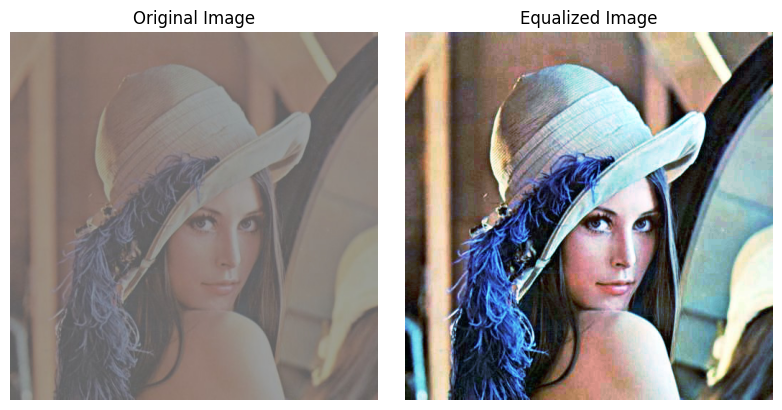

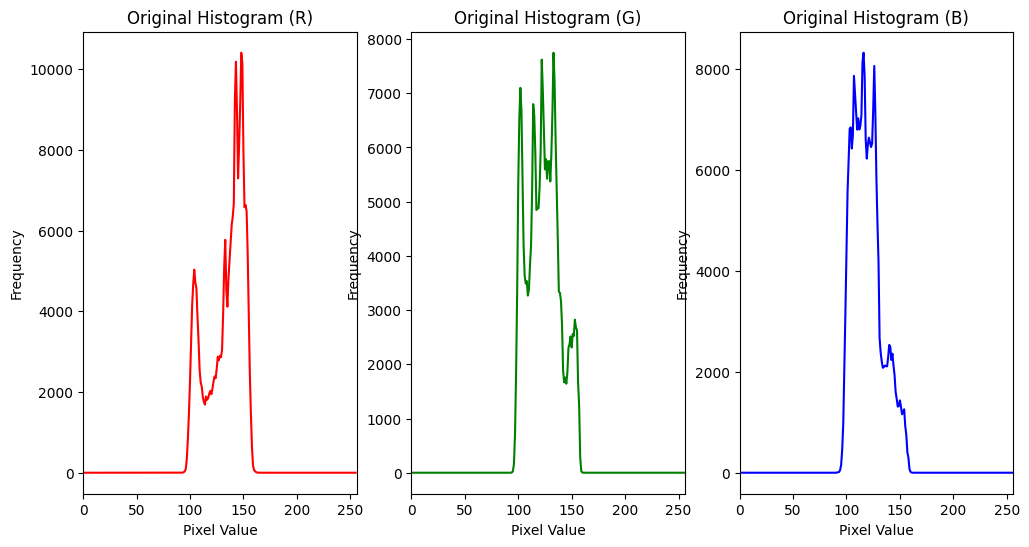

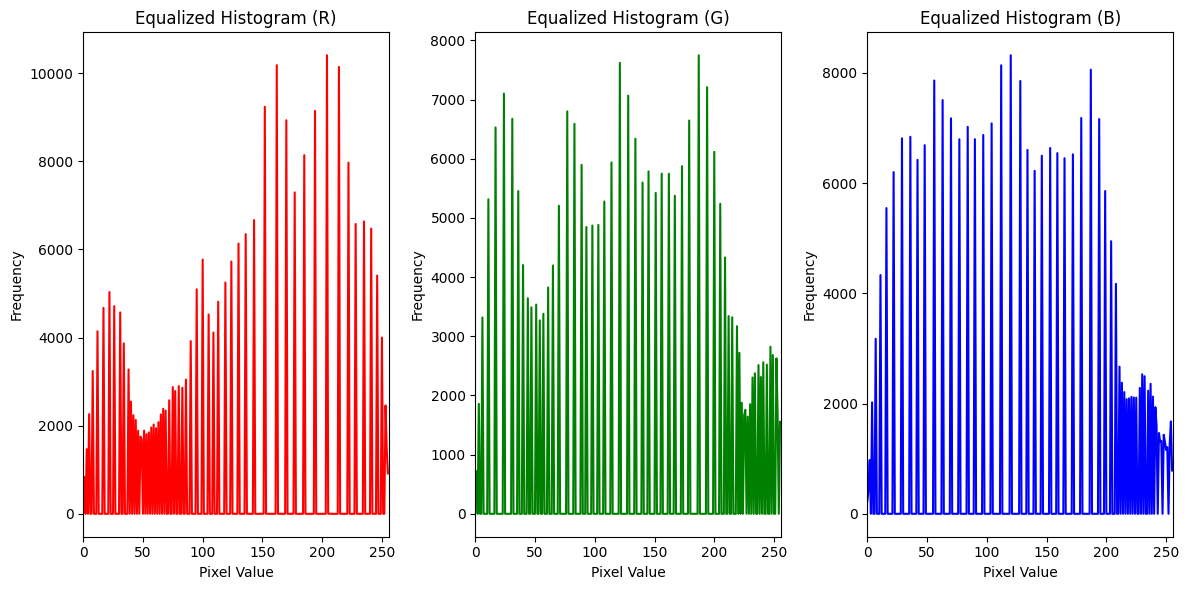

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Perform histogram equalization for each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Calculate the histograms for the original and equalized images for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Equalized Image
plt.subplot(2, 3, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

# Plot the original and equalized histograms for each channel
plt.figure(figsize=(12, 6))

# Original Histograms
plt.subplot(131)
plt.title("Original Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Original Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Original Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

# Equalized Histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Equalized Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Equalized Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Equalized Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_b, color='blue')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

**Manual**

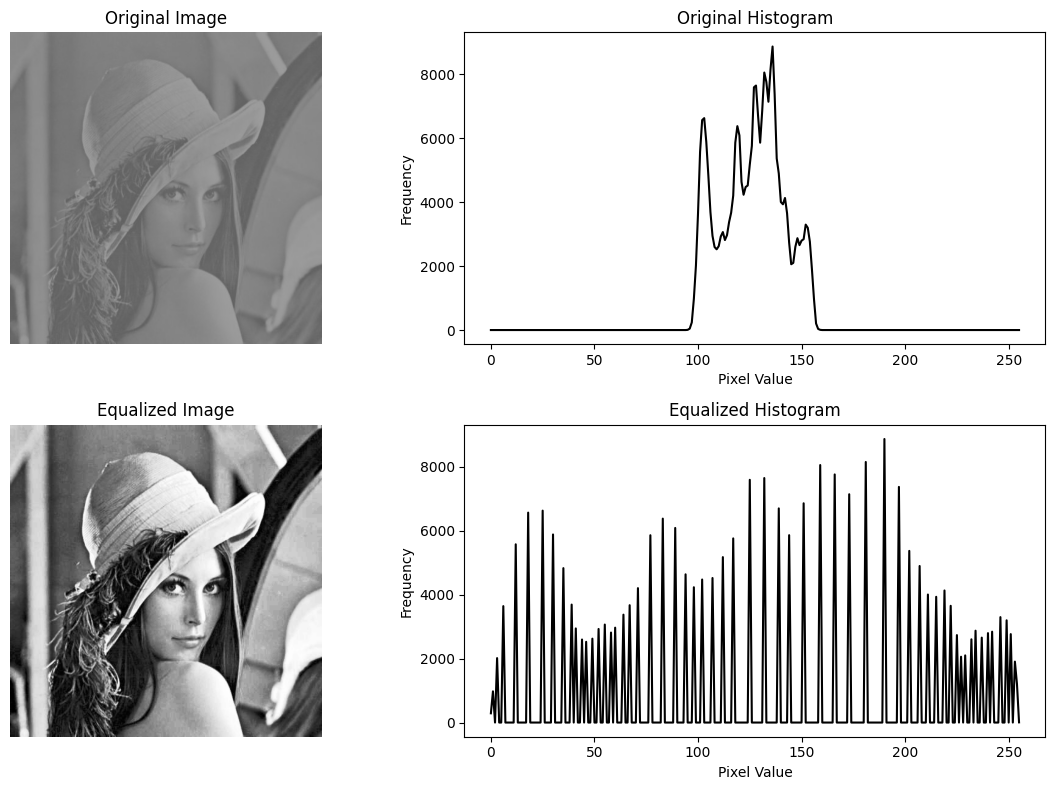

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Calculate the histogram of the original image
hist_original = np.zeros(256, dtype=int)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        hist_original[image[i, j]] += 1

# Step 3: Calculate the total number of pixels
total_pixels = image.shape[0] * image.shape[1]

# Step 4: Calculate the cumulative distribution function (CDF)
cdf = np.zeros(256, dtype=int)
cdf[0] = hist_original[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + hist_original[i]

# Step 5: Normalize the CDF to span the full range of pixel values
cdf_normalized = (cdf / total_pixels) * 255

# Step 6: Calculate the new pixel values manually
equalized_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        equalized_image[i, j] = cdf_normalized[image[i, j]]

# Step 8: Display the original image, histogram, equalized image, and equalized histogram
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_original, color='black')

plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Calculate the histogram of the equalized image manually
hist_equalized = np.zeros(256, dtype=int)
for i in range(equalized_image.shape[0]):
    for j in range(equalized_image.shape[1]):
        hist_equalized[equalized_image[i, j]] += 1

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized, color='black')

plt.tight_layout()
plt.show()

6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

<ipython-input-79-a82e915ac841>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)  # Start a new row
<ipython-input-79-a82e915ac841>:75: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(232)
<ipython-input-79-a82e915ac841>:82: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(233)


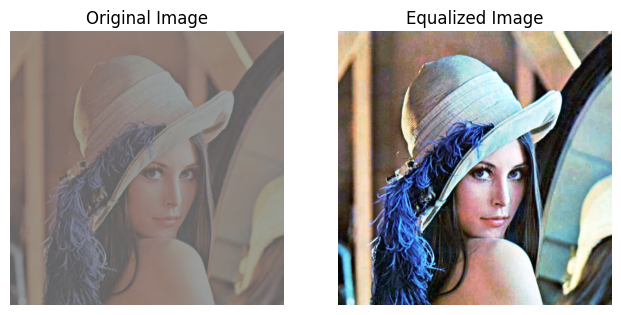

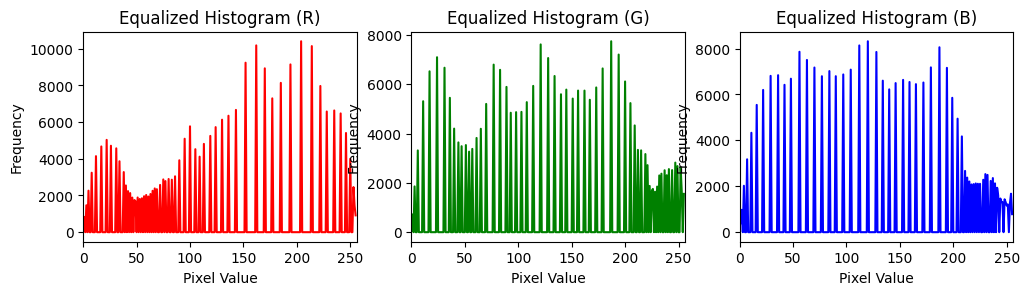

In [79]:
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Perform histogram equalization for each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Calculate the histograms for the original and equalized images for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Equalized Image
plt.subplot(2, 3, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Plot the original and equalized histograms for each channel
plt.figure(figsize=(12, 6))

# Original Histograms
plt.subplot(131)
plt.title("Original Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Original Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Original Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

# Equalized Histograms
plt.subplot(231)  # Start a new row
plt.title("Equalized Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_r, color='red')
plt.xlim([0, 256])

plt.subplot(232)
plt.title("Equalized Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_g, color='green')
plt.xlim([0, 256])

plt.subplot(233)
plt.title("Equalized Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_b, color='blue')
plt.xlim([0, 256])

plt.show()

First code:
- Organize the histogram of the original image and the histogram of the equalized image into three separate traces for each color channel (R, G, B).
- The histogram of the original image is displayed in separate subplots for each color channel (3 subplots).
- Histograms of the equalized images are displayed in separate subplots for each color channel (3 subplots).
- A total of 6 subplots are used to display graphs and images.

Second code:
- Organize the histogram of the original image and the histogram of the equalized image into three separate traces for each color channel (R, G, B).
- The histogram of the original image is displayed in separate subplots for each color channel (3 subplots).
- Histograms of the equalized images are displayed in separate subplots for each color channel (3 subplots).
- This subplot is arranged into 2 lines, each line has 3 subplots representing graphs and images.

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

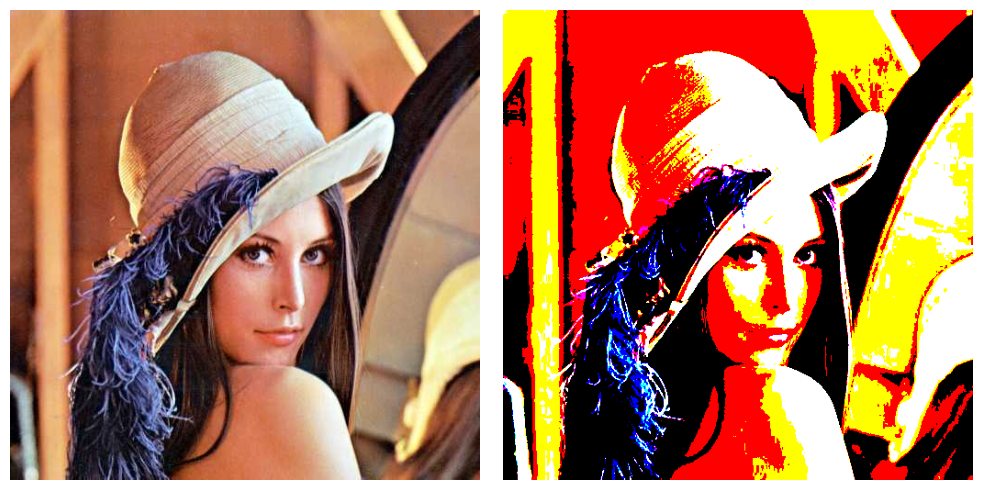

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the testlena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def colors (r, g, b):
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [
      [0, 0, 0],
      [255, 0, 0],
      [0, 255, 0],
      [255, 255, 0],
      [0, 0, 255],
      [255, 0, 255],
      [0, 255, 255],
      [255, 255, 255]
  ]

  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_mapping = np.zeros(img.shape, img.dtype)

for y in range(0, img.shape[0]):
  for x in range(0, img.shape[1]):
    baru = colors(img[y, x, 0], img[y, x, 1], img[y, x, 2])
    img_mapping[y, x] = warnaPallette[baru]

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mapping)
plt.axis('off')

plt.tight_layout()
plt.show()


8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

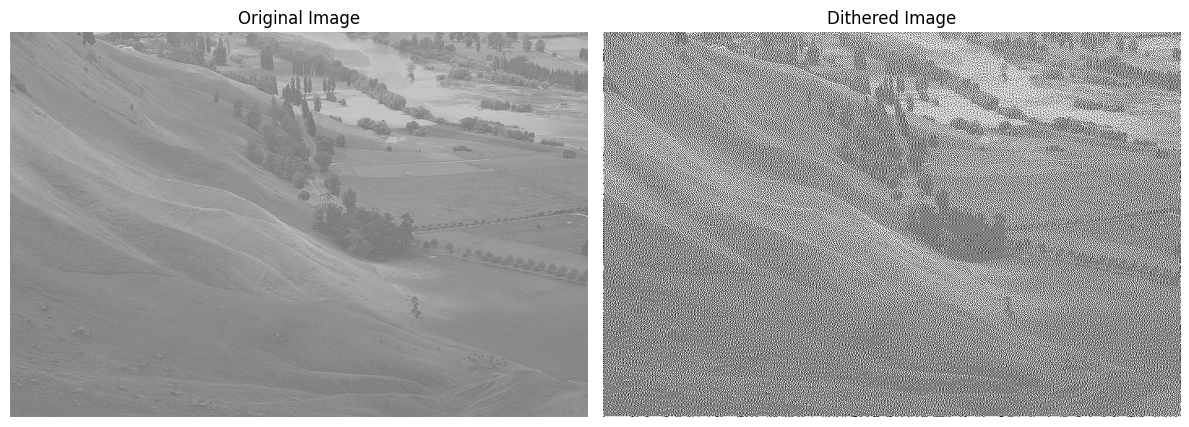

In [45]:
image = cv2.imread('/content/drive/MyDrive/PCVK/wiki.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the height and width of the image
height, width = gray_image.shape

# Create copies of the image to store the modified pixel values
dithered_image = np.copy(gray_image).astype(np.float32)

# Loop through each pixel in the image
for y in range(height - 1):
    for x in range(1, width - 1):
        # Get the old pixel value
        old_pixel = dithered_image[y, x]

        # Calculate the new pixel value based on the error
        new_pixel = round(old_pixel / 255.0) * 255.0

        # Update the pixel value in the dithered image
        dithered_image[y, x] = new_pixel

        # Calculate the quantization error
        error = old_pixel - new_pixel

        # Apply Floyd-Steinberg dithering to neighboring pixels
        dithered_image[y, x + 1] += error * 7 / 16
        dithered_image[y + 1, x - 1] += error * 3 / 16
        dithered_image[y + 1, x] += error * 5 / 16
        dithered_image[y + 1, x + 1] += error * 1 / 16

# Threshold the dithered image to get binary values (0 or 255)
dithered_image = (dithered_image > 128) * 255

# Display the original image and the dithered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Dithered Image")
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()